## Stock prices prediction
The other objective of this project is to predict the future 25 day closing prices of a tech company (Meta is selected in this instance) by the daily opening, highest, lowest prices and volume. I would be predicting the relationship using a linear regression model and evaluate the performance of the model in predicting closing prices.

The first step is to import required packages

In [131]:
## IMPORT PACKAGES ##
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Then, I import the data generated from Tiingo daily reader in the stock-analysis.ipynb jupyter notebook.

In [104]:
df = pd.read_csv("tech-stock-data.csv")

To predict closing prices of Meta, I first prepare a separate data frame for Meta data by extracting the relevant Meta  data and dropping the irrelevant columns (`symbol`,`adjClose`, `adjHigh`, `adjLow`, `adjOpen`,`adjVolume`,`divCash`,`splitFactor`, `date`). Following that, I added a new `target` column to include the closing prices of stocks after 25 days. Lastly, I dropped the last 25 rows, as they have null values in the `target` column.

In [105]:
meta = df.loc[df['symbol'] == "META"]

meta_df = meta.drop(columns=['symbol','adjClose', 'adjHigh', 'adjLow', 'adjOpen','adjVolume','divCash','splitFactor', 'date'])

meta_df['target'] = meta_df['close'].shift(-25)

meta_df.dropna(axis=0,inplace=True)


After preparing a data frame for Meta, I splitted the data frame into 80% of train data and 20% of test data to build a linear regression model.

In [106]:
meta_x = meta_df.drop('target', axis=1).copy()
meta_y = meta_df['target'].copy()

meta_x_train, meta_x_test, meta_y_train, meta_y_test  = train_test_split(meta_x, meta_y, test_size = 0.2)

I then inspect the number of rows and columns of the train and test data sets.

In [107]:
print("The shape of the training and testing data sets are as follows:\nmeta_x_train: {}\nmeta_x_test: {}\nmeta_y_train: {}\nmeta_y_test: {} \n".format(meta_x_train.shape, meta_x_test.shape, meta_y_train.shape, meta_y_test.shape))

print("There are {} rows and {} columns in the Meta training data set.\nThere are {} rows and {} columns in the Meta testing data set.".format(meta_y_train.shape[0], meta_x_train.shape[1], meta_y_test.shape[0], meta_x_test.shape[1]))

The shape of the training and testing data sets are as follows:
meta_x_train: (433, 5)
meta_x_test: (109, 5)
meta_y_train: (433,)
meta_y_test: (109,) 

There are 433 rows and 5 columns in the Meta training data set.
There are 109 rows and 5 columns in the Meta testing data set.


I build a linear regression model to predict closing prices with daily opening, highest, lowest prices and volume. Training data was used to build the model, then testing data was used to predict the future closing prices based on the model. Lastly, I evaluated the model performance based on R squared.

In [108]:
# building a model
regression = LinearRegression()
regression.fit(meta_x_train, meta_y_train)

# predicting future closing prices based on the model
meta_model_prediction = regression.predict(meta_x_test)
meta_model_r2 = abs(regression.score(meta_x_test,meta_y_test)*100)
print('The r2 of the linear regression model is: ', meta_model_r2.round(2), '%')


The r2 of the linear regression model is:  71.0 %


I then visualise the predictions versus actual closing prices.

Text(0.5, 1.0, 'Predicting Meta closing prices with linear regression')

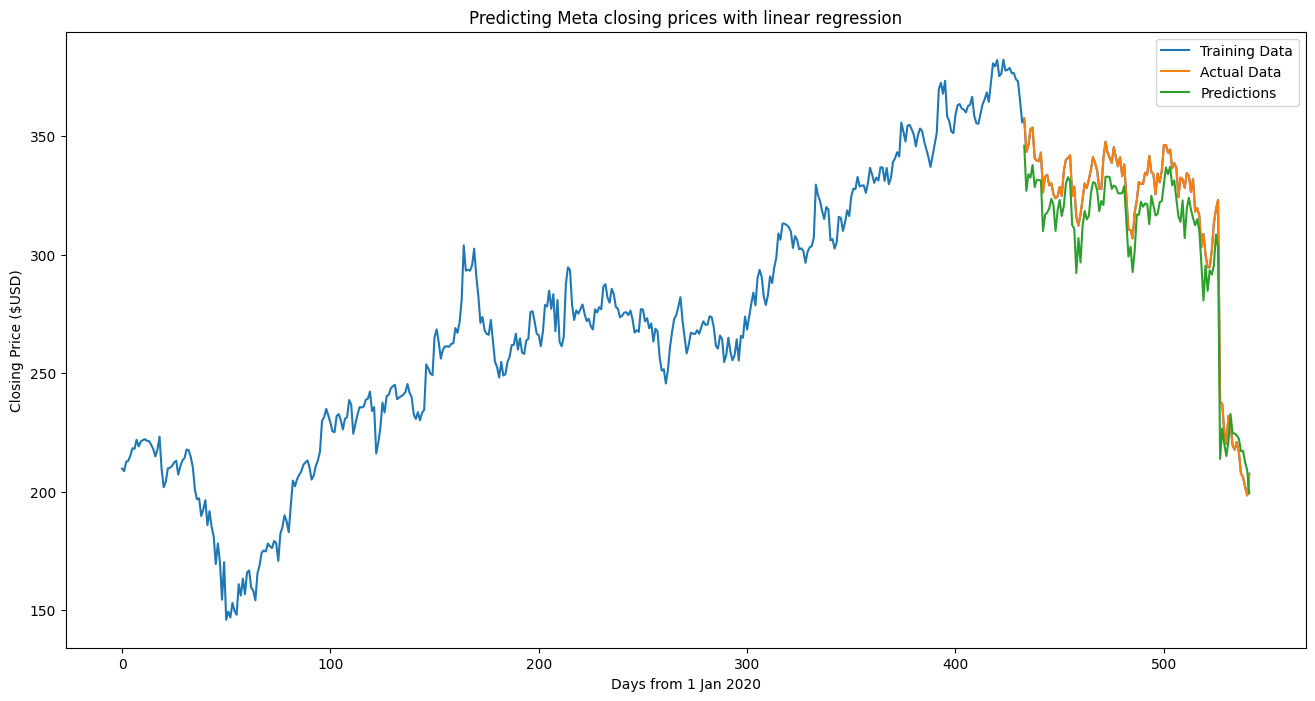

In [157]:
meta_model_plot = meta_df[433:].copy()
meta_model_plot['predict'] = regression.predict(meta_model_plot.drop(columns = 'target'))

plt.figure(figsize=[16,8])
plt.plot(meta_df['close'])
plt.plot(meta_model_plot[['close', 'predict']])
plt.legend(['Training Data', 'Actual Data', "Predictions"])
plt.xlabel('Days from 1 Jan 2020')
plt.ylabel('Closing Price ($USD)')
plt.title('Predicting Meta closing prices with linear regression')

To conclude, linear regression was used to predict Meta closing prices according to its daily opening, highest, lowest prices and volume. The predicters accounts for 84.14% of the variance in Meta's closing prices, which suggests that the linear regression model significantly predicts the closing prices.